In [1]:
from pymongo import MongoClient
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib as mpl
import datetime as dt

%matplotlib inline  

client = MongoClient(port=27123)
db = client.frevue_data
coll = db.Trips
#cursor = coll.find({"Owner": "United Kingdom, London, UPS"})

# import data and extract list of data owner and the count of data entries for each data owner 

In [9]:
# this section check the number of partners in the database
# choose a partner and check the number of unique vehicles
# then for each vehicle check the number of available days

cursor1 = coll.aggregate([
        {"$group": {"_id": "$Owner", "NumberOfRecords": {"$sum": 1}}}
    ])
array = list(cursor1)
vehlist = pd.DataFrame(array)    #list of operation partners
print vehlist

    NumberOfRecords                                          _id
0               413                Netherlands, Rotterdam, EMOSS
1             12675      Netherlands, Amsterdam & Rotterdam, TNT
2               161              United Kingdom, London, Clipper
3              1096                        Portugal, Lisbon, CTT
4               541             Netherlands, Amsterdam, Heineken
5              1143  Spain, Madrid, Calidad Pascual & SEUR & TNT
6              1652                  Netherlands, Rotterdam, UPS
7              2987  Netherlands, Amsterdam & Rotterdam, TNT RAW
8               319             Netherlands, Rotterdam, Heineken
9              1589                       Portugal, Lisbon, EMEL
10            15800                  United Kingdom, London, UPS
11               68                          Italy, Milano, AMAT


# choose a data owner

In [8]:
curpartner = vehlist.iloc[0,1]   #current partner can set up a loop  ********************
print "current data owner selected is " + curpartner

current data owner selected is Netherlands, Rotterdam, EMOSS


# now extract the number of vehicles (vehicleid) available for the chosen partner and the number of days which data is available for each vehicle

In [ ]:
# check valid recordings (distance bigger than 0)
cursor2 = coll.find(
        {"$and": [
                 {"Owner": curpartner},
                 {"Distance": {"$gt": 0}}
                ]
        })
PartnerData = pd.DataFrame(list(cursor2))
PartnerData['sday'] = [x.day for x in PartnerData['StartTime']]
PartnerData['eday'] = [x.day for x in PartnerData['EndTime']]
# printing
Veh_num = len(PartnerData['VehicleId'].unique()) #count the number of vehilces
print Veh_num    #number of vehicles


# need to check whether there are multiple trips from a same vehilce in a single day

In [6]:
PartnerData['starttime']

,Aggregation,DataPoints,Distance,Duration,EndTime,Extras,FileRelativePath,Frequency,Owner,StartTime,...,StateOfChargeEnd,StateOfChargeMax,StateOfChargeMin,StateOfChargeStart,StateOfChargeUp,TripId,VehicleId,_id,numofdays,VID
0,1,"[{u'extra_Kl15': True, u'soc': 99.2, u'extra_E...",70640.0,20569,2015-08-31 10:54:07,"{u'DistanceGps': {u'_v': 69608.2630917, u'_t':...",rotterdam-emoss\2015-08-30-0000_weekly-export-...,1,"Netherlands, Rotterdam, EMOSS",2015-08-31 05:11:18,...,64.8,99.2,64.8,99.2,2.0,2015-08-31,12-BFB-3,57b702c769e7d91cd0385999,222,1
1,1,"[{u'extra_Kl15': True, u'soc': 100.0, u'extra_...",6880.0,2689,2015-09-01 14:38:42,"{u'DistanceGps': {u'_v': 6645.73727664, u'_t':...",rotterdam-emoss\2015-08-30-0000_weekly-export-...,1,"Netherlands, Rotterdam, EMOSS",2015-09-01 13:53:53,...,95.2,100.0,95.2,100.0,0.0,2015-09-01,12-BFB-3,57b702c769e7d91cd038599a,222,1
2,1,"[{u'extra_Kl15': True, u'soc': 99.2, u'extra_E...",30340.0,28257,2015-09-02 13:01:32,"{u'DistanceGps': {u'_v': 26484.3894568, u'_t':...",rotterdam-emoss\2015-08-30-0000_weekly-export-...,1,"Netherlands, Rotterdam, EMOSS",2015-09-02 05:10:35,...,83.2,99.2,83.2,99.2,1.6,2015-09-02,12-BFB-3,57b702c769e7d91cd038599b,222,1
3,1,"[{u'extra_Kl15': True, u'soc': 99.2, u'extra_E...",41145.0,20280,2015-09-03 16:14:20,"{u'DistanceGps': {u'_v': 40634.3824437, u'_t':...",rotterdam-emoss\2015-08-30-0000_weekly-export-...,1,"Netherlands, Rotterdam, EMOSS",2015-09-03 10:36:20,...,79.2,99.2,79.2,99.2,2.0,2015-09-03,12-BFB-3,57b702c769e7d91cd038599c,222,1
4,1,"[{u'extra_Kl15': True, u'soc': 99.2, u'extra_E...",114690.0,31579,2015-09-04 14:17:13,"{u'DistanceGps': {u'_v': 112334.162098, u'_t':...",rotterdam-emoss\2015-08-30-0000_weekly-export-...,1,"Netherlands, Rotterdam, EMOSS",2015-09-04 05:30:54,...,48.8,99.2,48.8,99.2,13.6,2015-09-04,12-BFB-3,57b702c769e7d91cd038599d,222,1
5,1,"[{u'extra_Kl15': True, u'soc': 99.2, u'extra_E...",99430.0,18774,2015-09-07 13:39:51,"{u'DistanceGps': {u'_v': 95824.284812, u'_t': ...",rotterdam-emoss\2015-09-06-0000_weekly-export-...,1,"Netherlands, Rotterdam, EMOSS",2015-09-07 08:26:57,...,52.8,99.2,52.8,99.2,0.0,2015-09-07,12-BFB-3,57b702da69e7d91cd03859a3,222,1
6,1,"[{u'extra_Kl15': False, u'soc': 99.2, u'extra_...",78635.0,35843,2015-09-08 14:54:54,"{u'DistanceGps': {u'_v': 77148.5524577, u'_t':...",rotterdam-emoss\2015-09-06-0000_weekly-export-...,1,"Netherlands, Rotterdam, EMOSS",2015-09-08 04:57:31,...,58.0,99.2,58.0,99.2,4.4,2015-09-08,12-BFB-3,57b702da69e7d91cd03859a4,222,1
7,1,"[{u'extra_Kl15': True, u'soc': 99.2, u'extra_E...",83710.0,29662,2015-09-09 14:02:18,"{u'DistanceGps': {u'_v': 83967.6909553, u'_t':...",rotterdam-emoss\2015-09-06-0000_weekly-export-...,1,"Netherlands, Rotterdam, EMOSS",2015-09-09 05:47:56,...,64.8,99.2,64.8,99.2,13.2,2015-09-09,12-BFB-3,57b702da69e7d91cd03859a5,222,1
8,1,"[{u'extra_Kl15': True, u'soc': 99.2, u'extra_E...",46635.0,32395,2015-09-10 14:35:16,"{u'DistanceGps': {u'_v': 47606.0278277, u'_t':...",rotterdam-emoss\2015-09-06-0000_weekly-export-...,1,"Netherlands, Rotterdam, EMOSS",2015-09-10 05:35:21,...,91.2,100.0,84.0,99.2,16.8,2015-09-10,12-BFB-3,57b702da69e7d91cd03859a6,222,1
9,1,"[{u'extra_Kl15': True, u'soc': 99.2, u'extra_E...",39690.0,35810,2015-09-11 14:46:00,"{u'DistanceGps': {u'_v': 39136.5853613, u'_t':...",rotterdam-emoss\2015-09-06-0000_weekly-export-...,1,"Netherlands, Rotterdam, EMOSS",2015-09-11 04:49:10,...,79.2,99.2,79.2,99.2,1.2,2015-09-11,12-BFB-3,57b702da69e7d91cd03859a7,222,1


In [ ]:

# check how many days worth of data is availale for each vehicle
# PartnerData['newVID'] = PartnerData['VehicleId'].str[:6] ### ONLY FOR UPS (their data seems to have duplicate vehilces)
# Veh_num2 = len(PartnerData['newVID'].unique())
# print Veh_num2
#veh_days = pd.DataFrame(PartnerData.groupby('newVID').size().rename('numofdays'))
veh_days = pd.DataFrame(PartnerData.groupby('VehicleId').size().rename('numofdays'))
veh_days = veh_days.reset_index(range(veh_days.count()))
veh_days['VID'] = veh_days.index + 1
print veh_days
# merge to get unique vehilce ID for each vehicle (for plotting purpose)
#PartnerData = pd.merge(PartnerData, veh_days, left_on = "newVID", right_on = "newVID")
PartnerData = pd.merge(PartnerData, veh_days, left_on = "VehicleId", right_on = "VehicleId")
PartnerData['TripId'] = pd.to_datetime(PartnerData['TripId'])


(735602.0, 736300.0)

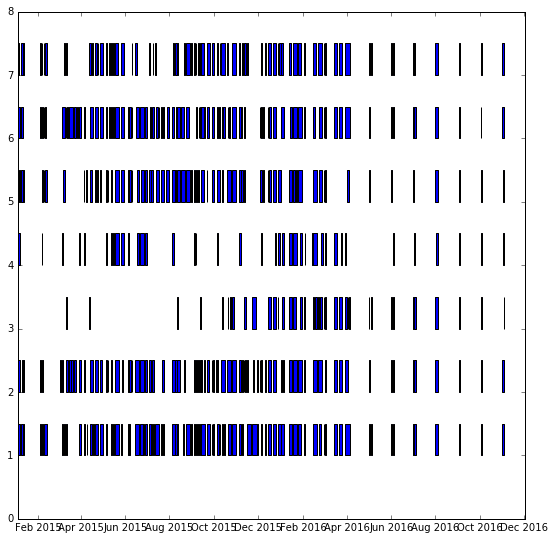

In [3]:
# plotting data availability
fig = plt.figure(figsize=(20, 20))
ax1 = fig.add_subplot(2,2,1)

for i in PartnerData['VehicleId'].unique():
    datelist = []
    selVehData = PartnerData[PartnerData['VehicleId']==i]
    curID = selVehData['VID'].iloc[0]
    sdate = selVehData['TripId'].min()
    edate = selVehData['TripId'].max()
    diffdate = edate - sdate
    dateswitch = 0
    curdate = sdate
    for j in range(0, int(diffdate.days)):
        predate = curdate                          #previous date
        curdate = curdate + dt.timedelta(days=1)     #current date
        if any(selVehData['TripId'] == curdate) and dateswitch == 1:
            sdate = curdate
            dateswitch = 0
        if (not any(selVehData['TripId'] == curdate)) and dateswitch == 0:   #if current date is not available, call plotting
            #pltmain(sdate, predate)
            datelist.append((mpl.dates.date2num(sdate), mpl.dates.date2num(curdate)-mpl.dates.date2num(sdate)))
            dateswitch = 1
    ax1.broken_barh(datelist, (curID,0.5))
ax1.xaxis_date()
ax1.set_xlim(PartnerData['TripId'].min(), PartnerData['TripId'].max())

In [ ]:
PartnerData.head(5)

In [ ]:
mpl.dates.date2num(dt.datetime.now())

In [ ]:
curdate = sdate + dt.timedelta(days=1)
print curdate
any(selVehData['TripId'] == curdate)

In [ ]:
#import datetime
#tt = datetime.datetime.strptime(PartnerData['TripId'], "%Y-%m-%d")
PartnerData['TripId'] = pd.to_datetime(PartnerData['TripId'])
#tt.apply(lambda x: x.strftime('%Y-%m-%d'))

In [ ]:
fig = plt.figure(figsize=(20, 20))
ax1 = fig.add_subplot(2,2,1)
#for i in range(0, PartnerData['TripId'].count()):
ax1.broken_barh(PartnerData['TripId'], PartnerData['VID'])

In [ ]:
cursor = coll.find(
        {"$and": [
                 {"Owner": "United Kingdom, London, UPS"},
                 {"Distance": {"$gt": 0}}
                ]
        })
UPSLondon = pd.DataFrame(list(cursor))

In [ ]:
cursor2 = coll.aggregate([
    {"$match": {"$and": [
                        {"Owner": vehlist.iloc[0,1]}, 
                        {"Distance": {"$gt": 0}}
                ]}
    },
    {"$group": {"_id": "$VehicleId", "AverageDistance": {"$avg": "$Distance"}}}
])

In [ ]:
print PartnerData.head(n=10)
PartnerData.iloc[0,5]
len(PartnerData['VehicleId'].unique())

In [ ]:
cursor1 = coll.aggregate([
        {"$group": {"_id": "$Owner", "NumberOfTrips": {"$sum": 1}}}
    ])
array = list(cursor1)
vehlist = pd.DataFrame(array)    #list of operation partners
curpartner = vehlist.iloc[7,1]   #current partner can set up a loop  ********************
print curpartner